In [2]:
#loans_income#Downloads   
import pandas as pd

In [3]:
df = pd.read_csv('Downloads/loans_income.csv')
df

,x
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
49995,40000
49996,54000
49997,50000
49998,82000


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem , t
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import os

# Bootstrap
defination of bootstrap  
 
 On easy anf effective way to estimate the sampling distribution of a statistics, or of model parameter is to draw addition sample , with replacement , from the sample itself and recalculate the statistic or model for each resample. this procedure is called the bootstrap.
 
 The bootstrapt is used for sample size determination, experiment with different values for n to see how the sampling distribution is affected. The algorithm for A Bootstrap
 
 Draw a sample value, record, replace it. Repeat n time, Record the mean of the n resample values, Repeat step 1-3 R time . Use the R result to.
 
 calculate their standard deviation .
 Produce a histogram or a boxplot.
 Find a confidence interval.

In [5]:
loans_income = np.array(df)


In [6]:
loans_income[:5]

array([[ 67000],
       [ 52000],
       [100000],
       [ 78762],
       [ 37041]], dtype=int64)

In [7]:
loans_income = np.array([item for sublist in loans_income for item in sublist ])

In [13]:
def bootstrap( I , R):
    n = len(loans_income)
    #Number of bootstrap samples
    means_of_boot_samples = []
    for reps in range(R):
        #steps1,2
        boot_sample = np.random.choice(loans_income,size = n)
        #step3
        means_of_boot_samples.append(round(np.mean(boot_sample),3))
    return means_of_boot_samples

bootstrap(loans_income, 5)
        

[68743.206, 68613.56, 68798.801, 68829.826, 68926.667]

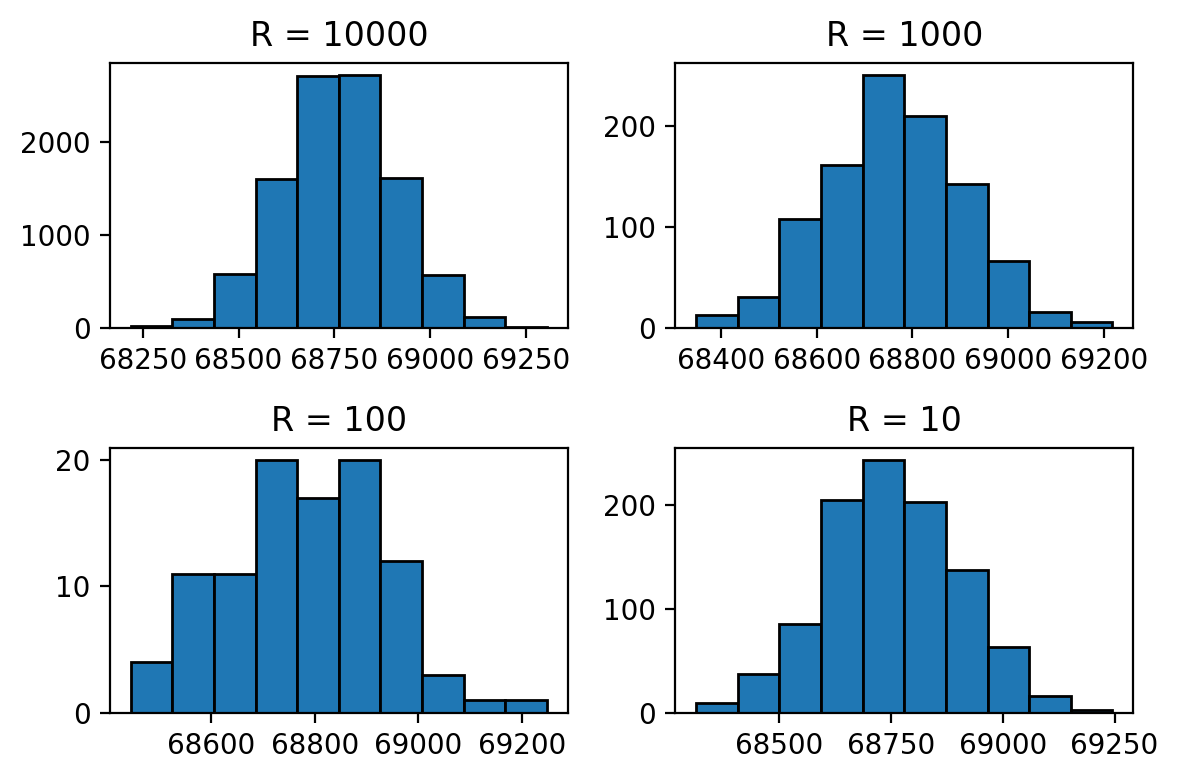

In [16]:
plt.figure(dpi = 200)
plt.subplot(221)
plt.title("R = 10000")
plt.hist(bootstrap(loans_income, 10000), edgecolor = 'k')

plt.subplot(222)
plt.title("R = 1000")
plt.hist(bootstrap(loans_income, 1000),edgecolor = 'k')

plt.subplot(223)
plt.title("R = 100")
plt.hist(bootstrap(loans_income, 100),edgecolor = 'k')

plt.subplot(224)
plt.title("R = 10")
plt.hist(bootstrap(loans_income, 1000),edgecolor = 'k')

plt.tight_layout()

In [17]:
data = bootstrap(loans_income , 1000)
lower_lim, upper_lim = np.percentile(data,2.5), np.percentile(data, 95)
print("Lower Limit: ", lower_lim)
print("Upper Limit: ", upper_lim)

Lower Limit:  68469.970675
Upper Limit:  68985.12305


As we can see distribution of 10000 means is more compact and bell-shaped than the distribution with smaller amount of means. This phenomenon is termed as central limit theorem. 

Find a confidence interval.


In [19]:
data = bootstrap(loans_income, 1000)
lower_lim, upper_lim = np.percentile(data, 2.5), np.percentile(data,95)
print("Lower Limit: ", lower_lim)
print("Upper Limit: ",upper_lim)

Lower Limit:  68452.93095
Upper Limit:  69004.00905000001


C:\Users\pga28\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


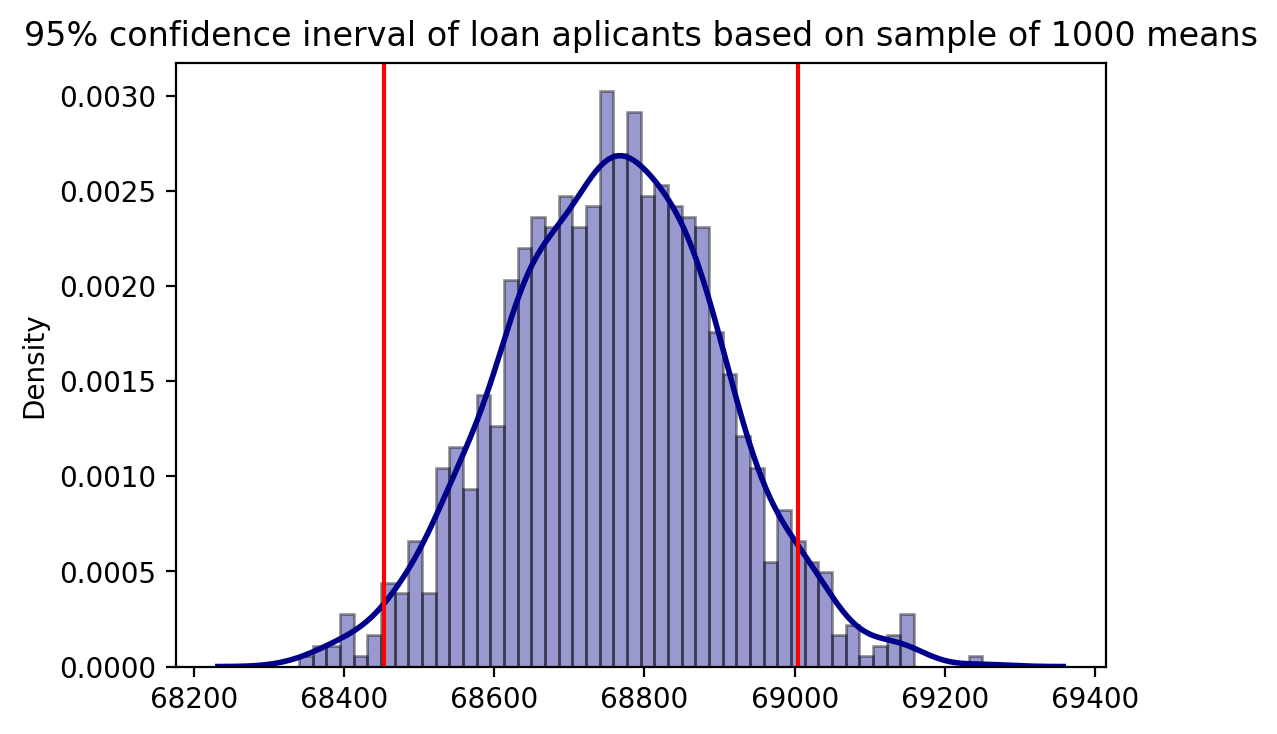

In [20]:
plt.figure(dpi = 200)
plt.title("95% confidence inerval of loan aplicants based on sample of 1000 means")

sns.distplot(bootstrap(loans_income, 1000), hist = True, kde= True,
            color = 'darkblue',bins = 50,
            hist_kws = {'edgecolor': 'black'},
            kde_kws = {'linewidth': 2})

plt.axvline(x = lower_lim, color = 'red')
plt.axvline(x = upper_lim, color = "red")